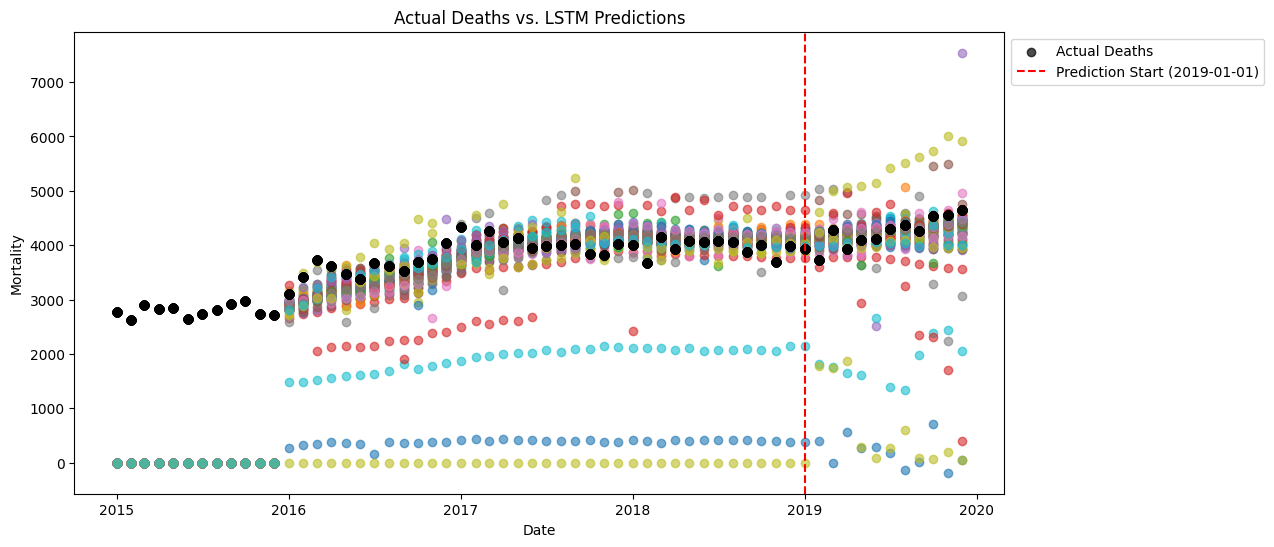

In [10]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Set directory containing CSV files
# directory = "single/batch_8_loss_mse_epoch_100"
directory = "various_100"

# Initialize lists to store data
all_data = []

# Function to extract seed from filename
def extract_seed(filename):
    match = re.search(r"seed_(\d+)_", filename)
    return match.group(1) if match else "Unknown"

# Read all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df["Seed"] = extract_seed(filename)  # Extract seed and add as a column
        all_data.append(df)

# Concatenate all dataframes
df_all = pd.concat(all_data, ignore_index=True)

# Convert 'Month' to datetime format
df_all["Month"] = pd.to_datetime(df_all["Month"])

# Define prediction start date
prediction_start_date = pd.to_datetime("2019-01-01")

# Plot LSTM Predictions vs. Actual Deaths
plt.figure(figsize=(12, 6))
for seed, df in df_all.groupby("Seed"):
    # plt.scatter(df["Month"], df["LSTM Predictions"], label=f"Seed {seed}", alpha=0.6)
    plt.scatter(df["Month"], df["LSTM Predictions"], alpha=0.6)
plt.scatter(df_all["Month"], df_all["Deaths"], color='black', label='Actual Deaths', alpha=0.7)
plt.axvline(x=prediction_start_date, color='red', linestyle='--', label='Prediction Start (2019-01-01)')
plt.xlabel("Date")
plt.ylabel("Mortality")
plt.title("Actual Deaths vs. LSTM Predictions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

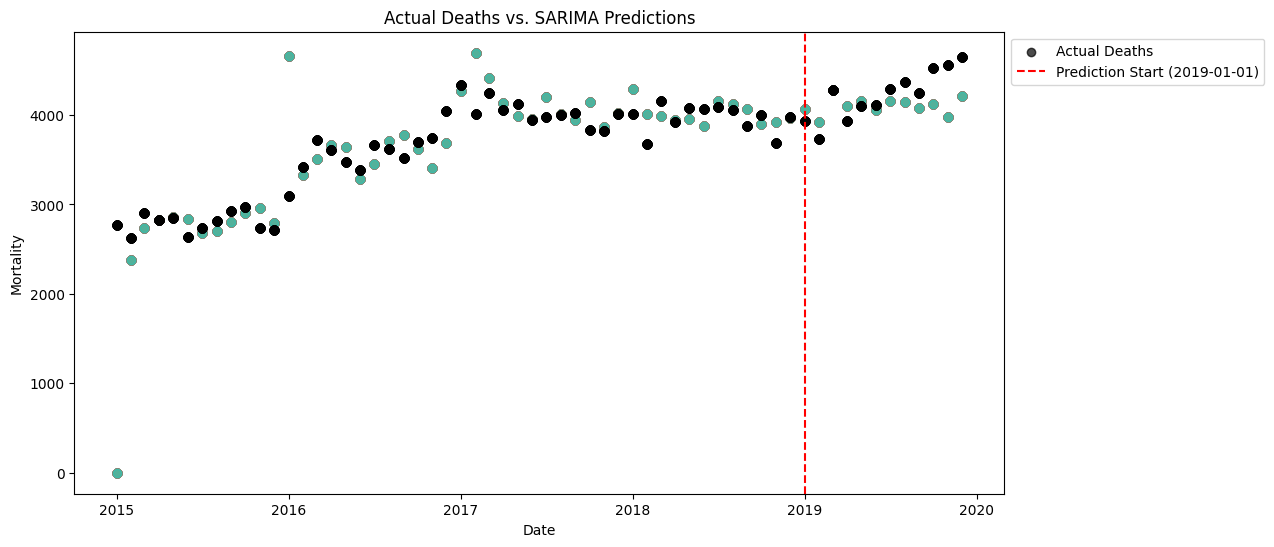

In [11]:
# Plot SARIMA Predictions vs. Actual Deaths
plt.figure(figsize=(12, 6))
for seed, df in df_all.groupby("Seed"):
    # plt.scatter(df["Month"], df["SARIMA Predictions"], label=f"Seed {seed}", alpha=0.6)
    plt.scatter(df["Month"], df["SARIMA Predictions"], alpha=0.6)
plt.scatter(df_all["Month"], df_all["Deaths"], color='black', label='Actual Deaths', alpha=0.7)
plt.axvline(x=prediction_start_date, color='red', linestyle='--', label='Prediction Start (2019-01-01)')
plt.xlabel("Date")
plt.ylabel("Mortality")
plt.title("Actual Deaths vs. SARIMA Predictions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()